<a href="https://colab.research.google.com/github/merlynmctr/11181047_Merlyn_DM_IF-ITK/blob/main/11181047_Merlyn_DM_IF_ITK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/DataMining/

/content/drive/MyDrive/DataMining


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings 
warnings.filterwarnings("ignore")

In [7]:
datairis = pd.read_csv("IRIS.csv")

In [8]:
datairis.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
datairis.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


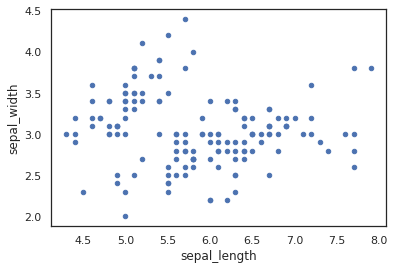

In [12]:
datairis.plot(kind="scatter", x="sepal_length", y="sepal_width")

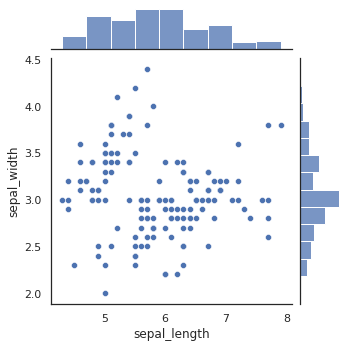

In [14]:
sns.jointplot(x="sepal_length", y="sepal_width", data=datairis, size=5)

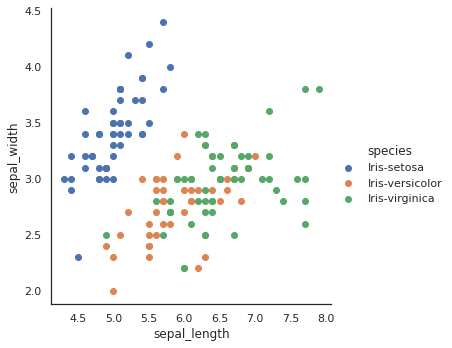

In [15]:
sns.FacetGrid(datairis, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

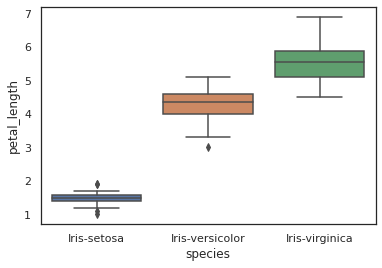

In [16]:
sns.boxplot(x="species", y="petal_length", data=datairis)

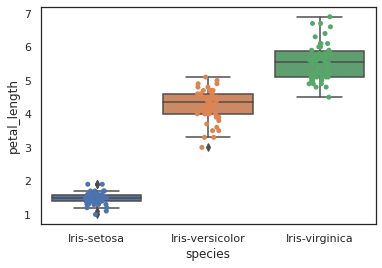

In [19]:
xy = sns.boxplot(x="species", y="petal_length", data=datairis)
xy = sns.stripplot(x="species", y="petal_length", data=datairis, jitter=True, edgecolor="yellow")

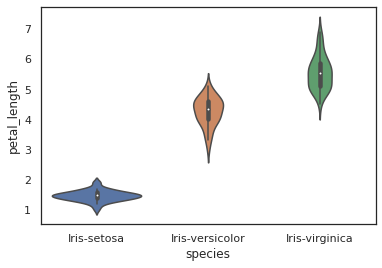

In [20]:
sns.violinplot(x="species", y="petal_length", data=datairis, size=6)

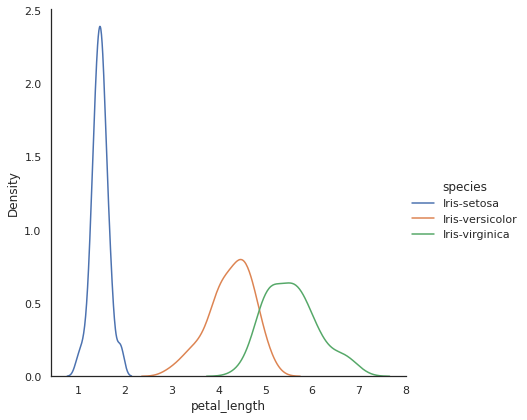

In [21]:
sns.FacetGrid(datairis, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

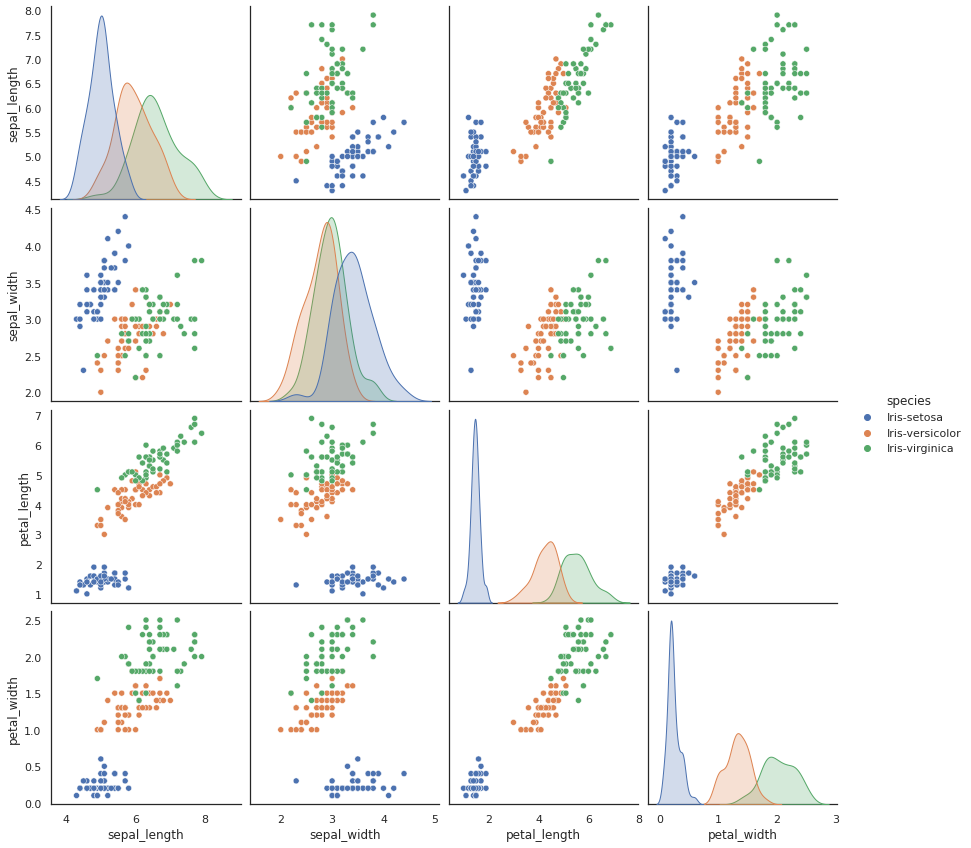

In [22]:
sns.pairplot(datairis, hue="species", size=3)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [27]:
X = datairis.iloc[:, :-1].values
y = datairis.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [28]:
#Super Vector Machine (SVM)
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]
accuracy is 0.9333333333333333


In [29]:
X = datairis.iloc[:, :-1].values
y = datairis.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [30]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.95      0.90      0.93        21

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60

[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
accuracy is 0.95


Telah dilakukan training dan testing data Iris menggunakan 2 metode, yaitu Super Vector Machine dan Decision Tree. Dari kedua metode tersebut diuji ukuran 0,4 dan masing - masing metode menghasilkan akurasi yang berbeda, metode Decision Tree lebih unggul yaitu akurasinya 0,95 sedangkan metode SVM akurasinya 0,93.